# UNAD
## Realizado por: 
#### ♥ Juliana Alejandra Diaz
#### ♥ Danna Geraldine Garcia
#### ♥ Alixon Xiomara Sánchez
## Agrupamiento en K-means

## Pasos de la Actividad
##### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
##### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
##### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
##### 4. Entrenar el modelo configurando los diferentes hiperparámetros.
##### 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.
##### 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo
##### 7. Interpretar, analizar y documentar los resultados obtenidos.os obtenidos.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [10]:
# Cargar las librerias necesarias
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go 
import plotly.express as px 

# Librerias para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Librerias para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Librerias para evitar la advertencia de que el modelo de KMeans tiene una perdida de memoria en windows
import warnings
warnings.filterwarnings('ignore')

In [12]:
# lectura de datos en Python y lo cargamos en la variable Datos
Datos = pd.read_csv('Mall_Customers.csv')

In [16]:
# Se realiza lectura de los datos para el analisis exploratorio
Datos.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
# Descripcion de los datos del Mall
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


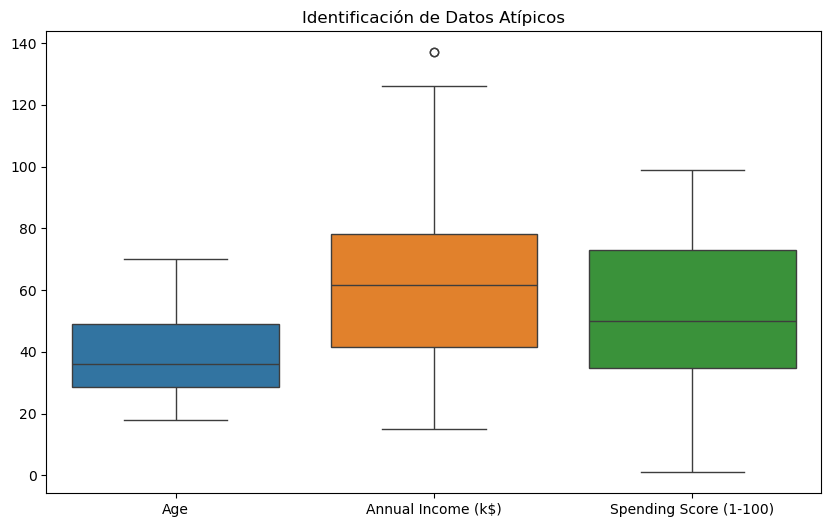

In [44]:
# Identificación de Datos Atípicos y Faltantes

# Boxplot para detectar outliers(Valores Atipicos)
plt.figure(figsize=(10, 6))
sns.boxplot(data=Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title("Identificación de Datos Atípicos")
plt.show()

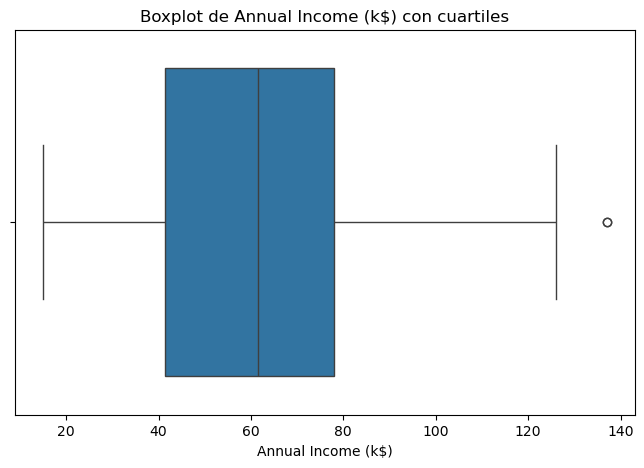

In [28]:
# Observamos que en la columna 'Annual Income (k$) tiene valores Atípicos (Outliers)

plt.figure(figsize=(8, 5))
sns.boxplot(data=Datos, x='Annual Income (k$)')
plt.title("Boxplot de Annual Income (k$) con cuartiles")
plt.xlabel("Annual Income (k$)")
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario: 

In [30]:
# Calculando los cuartiles y el rango intercuartil (IQR)
Q1 = Datos['Annual Income (k$)'].quantile(0.25)
Q3 = Datos['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

print("Primer cuartil (Q1):", Q1)
print("Tercer cuartil (Q3):", Q3)
print("Rango intercuartil (IQR):", IQR)

Primer cuartil (Q1): 41.5
Tercer cuartil (Q3): 78.0
Rango intercuartil (IQR): 36.5


In [32]:
# Filtrando valores atípicos
outliers = Datos[Datos['Annual Income (k$)'] > 132.75]
print(outliers)

     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83


In [34]:
Datos_sin_outliers = Datos[Datos['Annual Income (k$)'] <= 132.75]

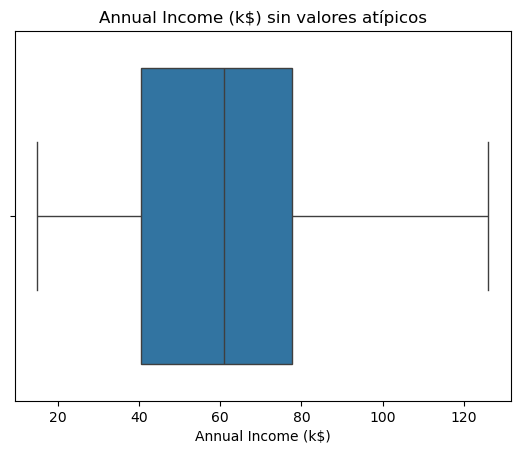

In [40]:
# Verificando que se eliminaron correctamente los valores atípicos para 'Annual Income (k$)'
sns.boxplot(data=Datos_sin_outliers, x='Annual Income (k$)')
plt.title("Annual Income (k$) sin valores atípicos")
plt.xlabel("Annual Income (k$)")
plt.show()

In [46]:
# Verificar valores faltantes en cada columna de mi Mall
Datos.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [48]:
#Revisión de Tipo de Datos
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
#### Caracteristicas de Interes para el Agrupamiento:
##### ♥ Age
##### ♥ Annual Income (k$)
##### ♥ Spending Score (1-100)

In [63]:
# Filtrando Columnas del Modelo
Datos = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [65]:
# Revisión de los Datos con las Variables Objetivo
Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


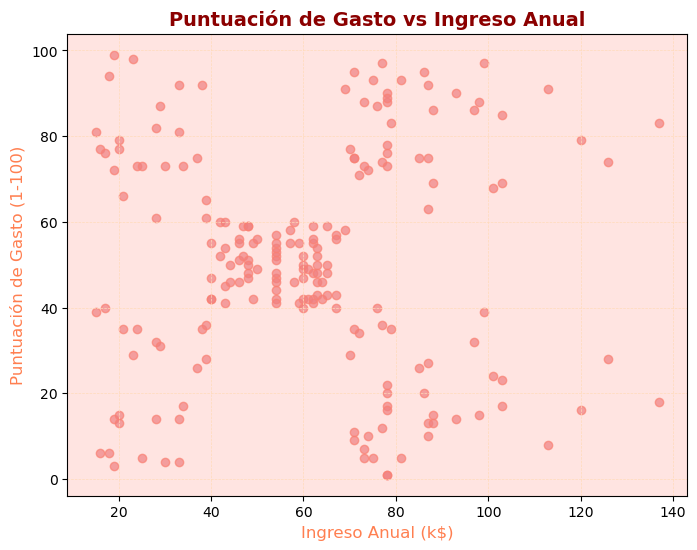

In [81]:
# Graficamos antes del agrupamiento

plt.figure(figsize=(8, 6))
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], color='lightcoral', alpha=0.7, edgecolors='salmon')

plt.xlabel('Ingreso Anual (k$)', color='coral', fontsize=12)
plt.ylabel('Puntuación de Gasto (1-100)', color='coral', fontsize=12)
plt.title('Puntuación de Gasto vs Ingreso Anual', color='darkred', fontsize=14, fontweight='bold')

plt.gca().set_facecolor('mistyrose')  
plt.grid(color='peachpuff', linestyle='--', linewidth=0.5)

plt.show()

## 4. Entrenar el Modelo Configurando los Diferentes Hiperparámetros

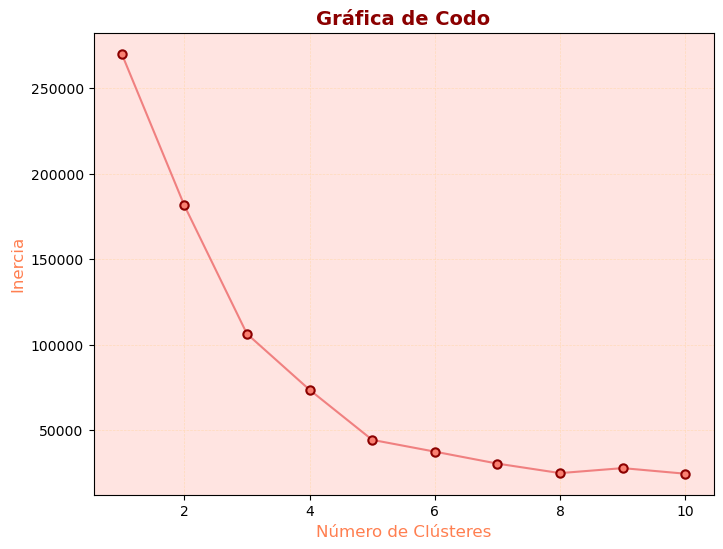

In [146]:
# Realizamos grafica de Codo para Identificar Valor K

final = Datos[['Annual Income (k$)', 'Spending Score (1-100)']]  

ilist = []
n = 11  

for i in range(1, n):
    km = KMeans(n_clusters=i)
    km.fit_predict(final)
    ilist.append(km.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, n), ilist, color='lightcoral', marker='o', markerfacecolor='salmon', 
         markeredgewidth=1.5, markeredgecolor='darkred', linestyle='-', linewidth=1.5)
plt.gca().set_facecolor('mistyrose')  
plt.xlabel('Número de Clústeres', color='coral', fontsize=12)
plt.ylabel('Inercia', color='coral', fontsize=12)
plt.title('Gráfica de Codo', color='darkred', fontsize=14, fontweight='bold')
plt.grid(color='peachpuff', linestyle='--', linewidth=0.5)
plt.show()

In [148]:
# Generación del Modelo de Agrupamiento del Modelo con K = 5 (Es decir haremos 5(cinco) grupos del agrupamiento)
km=KMeans(n_clusters=5)
y_pred=km.fit_predict(final)
y_pred

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [158]:
# Se agrega la columna Cluster a la base de datos Mall para identificar el número de grupo del agrupamiento
Datos['Cluster'] = y_pred
Datos

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,4
1,21,15,81,1
2,20,16,6,4
3,23,16,77,1
4,31,17,40,4
...,...,...,...,...
195,35,120,79,3
196,45,126,28,2
197,32,126,74,3
198,32,137,18,2


## 5. Evaluar el Desempeño del Modelo con Métricas como: Coeficiente de Silhouette, Índice de Calinski-Harabasz e Índice de Davies Bouldin 

In [187]:
# Desempeño del Modelo con el Coeficiente de Silhouette, Índice de Calinski-Harabasz e Índice de Davies Bouldin

# Coeficiente de Silhouette
sil_score = silhouette_score(final, y_pred)
print(f"Coeficiente de Silhouette: {sil_score:.3f}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(final, y_pred)
print(f"Índice de Calinski-Harabasz: {ch_score:.3f}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(final, y_pred)
print(f"Índice de Davies-Bouldin: {db_score:.3f}")

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

Coeficiente de Silhouette: 0.468
Índice de Calinski-Harabasz: 151.557
Índice de Davies-Bouldin: 0.715
+-----------------------------+---------------------+
|           Metric            |        Value        |
+-----------------------------+---------------------+
|   Numero de Observaciones   |         200         |
|   Coeficiente Silhouette    | 0.34885802600690224 |
| Índice de Calinski Harabasz |  97.67633162091205  |
|  Índice de Davies Bouldin   | 0.9229226933196047  |
+-----------------------------+---------------------+


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del Modelo

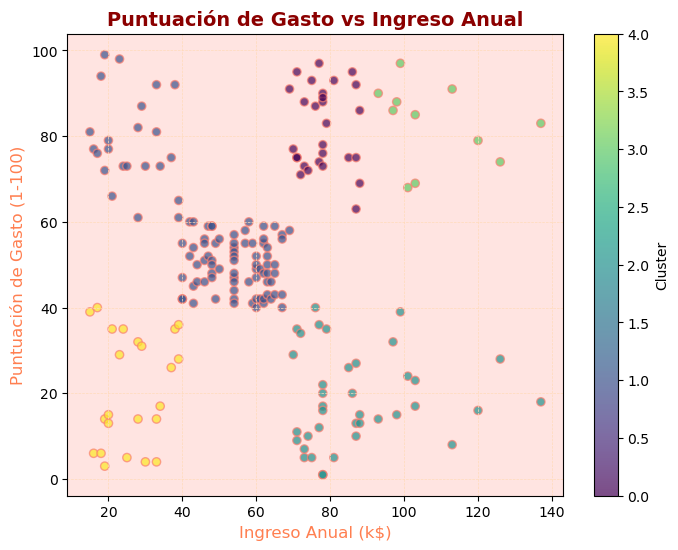

In [193]:
plt.figure(figsize=(8, 6))
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], 
            c=Datos['Cluster'], cmap='viridis', alpha=0.7, edgecolors='salmon')

plt.xlabel('Ingreso Anual (k$)', color='coral', fontsize=12)
plt.ylabel('Puntuación de Gasto (1-100)', color='coral', fontsize=12)
plt.title('Puntuación de Gasto vs Ingreso Anual', color='darkred', fontsize=14, fontweight='bold')

plt.gca().set_facecolor('mistyrose')  
plt.grid(color='peachpuff', linestyle='--', linewidth=0.5)

plt.colorbar(label='Cluster')
plt.show()

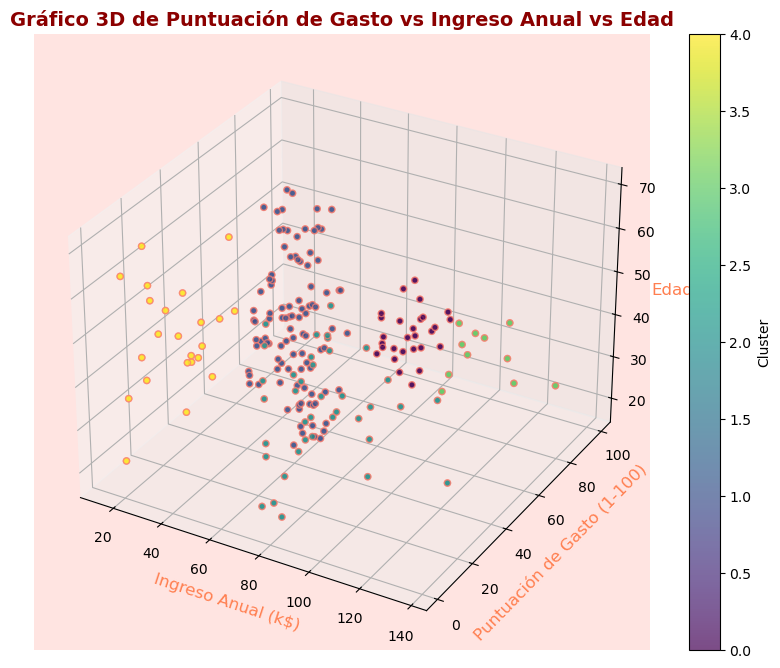

In [195]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Creando un gráfico 3D de los datos agrupados
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], Datos['Age'], 
           c=Datos['Cluster'], cmap='viridis', alpha=0.7, edgecolors='salmon')
ax.set_xlabel('Ingreso Anual (k$)', color='coral', fontsize=12)
ax.set_ylabel('Puntuación de Gasto (1-100)', color='coral', fontsize=12)
ax.set_zlabel('Edad', color='coral', fontsize=12)

# Título del gráfico
ax.set_title('Gráfico 3D de Puntuación de Gasto vs Ingreso Anual vs Edad', color='darkred', fontsize=14, fontweight='bold')
ax.set_facecolor('mistyrose')
fig.colorbar(ax.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], Datos['Age'], 
                       c=Datos['Cluster'], cmap='viridis', alpha=0.7, edgecolors='salmon'), label='Cluster')
plt.show()

In [176]:
from sklearn.cluster import KMeans

final = final[['Annual Income (k$)', 'Spending Score (1-100)']]

n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(final)
y_pred = kmeans.predict(final)

In [178]:
# Obteniendo los centroides de los clústeres
centroids = kmeans.cluster_centers_

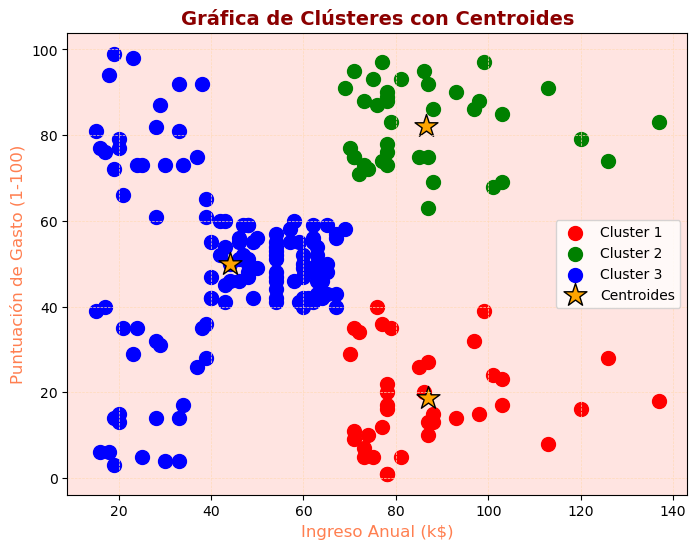

In [199]:
# Filtrando los datos por cada grupo de clúster
cluster_0 = final[y_pred == 0]
cluster_1 = final[y_pred == 1]
cluster_2 = final[y_pred == 2]
plt.figure(figsize=(8, 6))
plt.scatter(cluster_0['Annual Income (k$)'], cluster_0['Spending Score (1-100)'], label='Cluster 1', c='r', s=100)
plt.scatter(cluster_1['Annual Income (k$)'], cluster_1['Spending Score (1-100)'], label='Cluster 2', c='g', s=100)
plt.scatter(cluster_2['Annual Income (k$)'], cluster_2['Spending Score (1-100)'], label='Cluster 3', c='b', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='orange', marker='*', label='Centroides', edgecolors='black')
plt.xlabel('Ingreso Anual (k$)', fontsize=12, color='coral')
plt.ylabel('Puntuación de Gasto (1-100)', fontsize=12, color='coral')
plt.title('Gráfica de Clústeres con Centroides', fontsize=14, fontweight='bold', color='darkred')
plt.gca().set_facecolor('mistyrose')  
plt.grid(color='peachpuff', linestyle='--', linewidth=0.5)

plt.legend()
plt.show()

## 7. Interpretar, analizar y documentar los resultados obtenidos

### Del desempeño del Modelo K-Means de los Datos del Mall se puede describir:

#### ♥ Coeficiente de Silhouette: El valor de 0.468 indica que los clústeres son razonablemente coherentes, pero la separación entre ellos podría ser mejor. Este valor sugiere que los puntos dentro de cada clúster están algo separados de los demás, pero existe margen para mejorar la claridad en la diferenciación entre clústeres. En general, un valor más cercano a 1 reflejaría una separación más nítida y una mejor calidad en los clústeres.

#### ♥ Índice de Calinski-Harabasz: valor: 151,557: Este valor relativamente alto sugiere que los clústeres están bien separados en comparación con su dispersión interna. La calidad de la separación entre los clústeres es adecuada, lo que indica que el modelo ha logrado agrupar los datos de forma efectiva. Sin embargo, aún es posible optimizar el modelo para mejorar esta separación y la definición de los clústeres.

#### ♥ Índice de Davies-Bouldin: El valor bajo de refleja que los clústeres son compactos y bien separados. Esto indica que la calidad de los clústeres es buena en cuanto a su cohesión y separación, lo cual es positivo. Sin embargo, siempre es posible mejorar esta métrica ajustando los parámetros del modelo, como el número de clústeres.